# Importing data and taking a quick look at it.

In [20]:
#importing the required libraries.
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [21]:
#loading the dataset
dataset = pd.read_csv('/Users/apple/DATA NOTEBOOKS/social_media_engagement1.csv')
dataset.head(10)

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive
5,6,Instagram,carousel,5/5/2023 20:00,256,186,211,Friday,neutral
6,7,Instagram,image,2/26/2023 11:45,1982,30,906,Sunday,positive
7,8,Instagram,text,10/28/2023 19:30,1274,45,216,Saturday,neutral
8,9,Facebook,video,5/2/2023 6:15,317,249,221,Tuesday,neutral
9,10,Twitter,carousel,5/11/2023 11:00,1878,225,438,Thursday,neutral


# Cleaning the data

In [22]:
dataset.isna().sum()

post_id            0
platform           0
post_type          0
post_time          0
likes              0
comments           0
shares             0
post_day           0
sentiment_score    0
dtype: int64

*No null values in any of the columns.*

In [23]:
dataset.dtypes

post_id             int64
platform           object
post_type          object
post_time          object
likes               int64
comments            int64
shares              int64
post_day           object
sentiment_score    object
dtype: object

The column 'post_time' should be date time datatype.

In [24]:
dataset['post_time'] = pd.to_datetime(dataset['post_time'])

In [25]:
dataset.dtypes

post_id                     int64
platform                   object
post_type                  object
post_time          datetime64[ns]
likes                       int64
comments                    int64
shares                      int64
post_day                   object
sentiment_score            object
dtype: object

`Extracting hour from post_time column so as to analyse the impact of time of posting on the overall performance of a post. `

In [26]:
dataset['hour'] = dataset['post_time'].dt.hour

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   post_id          100 non-null    int64         
 1   platform         100 non-null    object        
 2   post_type        100 non-null    object        
 3   post_time        100 non-null    datetime64[ns]
 4   likes            100 non-null    int64         
 5   comments         100 non-null    int64         
 6   shares           100 non-null    int64         
 7   post_day         100 non-null    object        
 8   sentiment_score  100 non-null    object        
 9   hour             100 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 7.9+ KB


# Exploratory Data Analysis (EDA) and Engagement Score analysis for each platform.

In [28]:
dataset.describe()

,post_id,likes,comments,shares,hour
count,100.000000,100.000000,100.00000,100.000000,100.000000
mean,50.500000,2381.810000,202.66000,415.650000,11.020000
std,29.011492,1632.573284,138.84067,283.877601,7.072468
min,1.000000,15.000000,10.00000,16.000000,0.000000
25%,25.750000,895.750000,89.75000,183.000000,5.000000
50%,50.500000,2220.000000,171.00000,356.500000,11.000000
75%,75.250000,3593.250000,299.00000,689.500000,17.000000
max,100.000000,5000.000000,500.00000,993.000000,23.000000


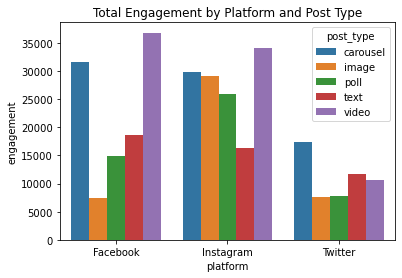

In [29]:
dataset_grouped_platform = dataset.groupby(['platform', 'post_type'])\
 [['likes', 'shares', 'comments']].sum().reset_index()
dataset_grouped_platform['engagement'] = dataset_grouped_platform['likes'] + dataset_grouped_platform['shares'] + dataset_grouped_platform['comments']
sns.barplot(data=dataset_grouped_platform, x='platform', y='engagement', hue='post_type')
plt.title('Total Engagement by Platform and Post Type')
plt.show()



```
TOP 3 post type for each social media site:
Facebook and Twitter: Carousel, Video and Text
Instagram: Video, Carousel and Image
```



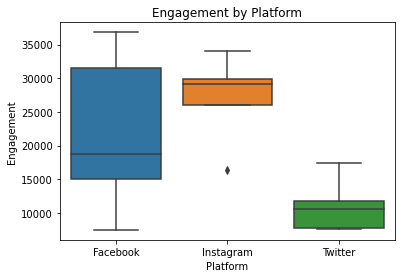

In [30]:
sns.boxplot(x='platform', y='engagement', data=dataset_grouped_platform)
plt.title('Engagement by Platform')
plt.xlabel('Platform')
plt.ylabel('Engagement')
plt.show()

`The only outlier in the above data is from the Instagram platform of the post type text.
This is understandable as Instagram is primarily used for sharing photos and videos.
Mean engagement of Instagram being the highest.`

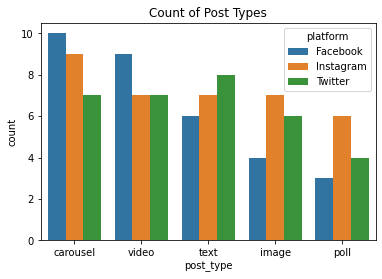

In [31]:
sorted_data = dataset['post_type'].value_counts().index
sns.countplot(x='post_type', data=dataset, order=sorted_data, hue='platform')
plt.title('Count of Post Types')
plt.show()

*Investigating further into the engagement for each post type on each platform we can observe that carousel and video post have significantly better engagement score than the other post types.*

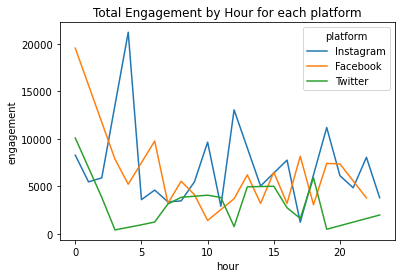

In [32]:
dataset_grouped_hour = dataset.groupby(['platform', 'hour'])[['likes', 'comments', 'shares']].sum().reset_index()
dataset_grouped_hour['engagement'] = dataset_grouped_hour['likes'] + dataset_grouped_hour['comments'] + dataset_grouped_hour['shares']
dataset_grouped_hour = dataset_grouped_hour.sort_values(by='engagement', ascending=False)
sns.lineplot(x='hour', y='engagement', data=dataset_grouped_hour, hue='platform')
plt.title('Total Engagement by Hour for each platform')
plt.show()

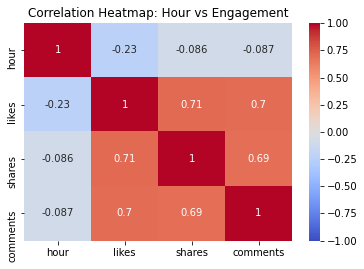

In [33]:
#Finding corelation between engagement scores and time of the data.
correlation_matrix = dataset_grouped_hour[['hour', 'likes', 'shares', 'comments']].corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Hour vs Engagement')
plt.show()


***There is not a strong corelation between hour of the day and engagement.
Let us look if the day of the week has any impact on the engagement scores.***

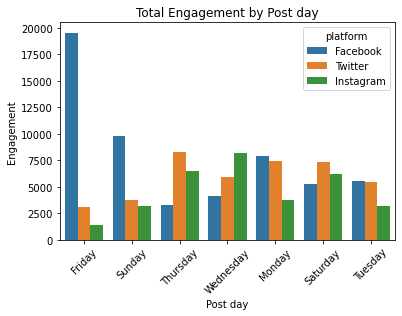

In [34]:
from sys import platform
dataset_grouped_dow = dataset.groupby(['platform', 'post_day'])[['likes', 'comments', 'shares']].sum().reset_index()
dataset_grouped_dow['engagement'] = dataset_grouped_hour['likes'] + dataset_grouped_hour['comments'] + dataset_grouped_hour['shares']
dataset_grouped_dow = dataset_grouped_dow.sort_values(by='engagement', ascending=False)
sns.barplot(x='post_day', y='engagement', data=dataset_grouped_dow, ci=None, hue='platform')
plt.title('Total Engagement by Post day')
plt.xlabel('Post day')
plt.ylabel('Engagement')
plt.xticks(rotation=45)
plt.show()

*Maximum engagement is observed in Facebook on Friday, in Twitter on Thursday and in Instagram on Wednesday.*

# Sentiment and Engagement Analysis.

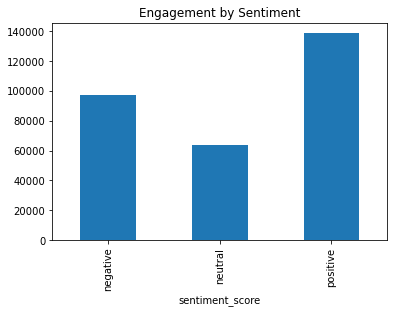

In [35]:
sentiment_analysis = dataset.groupby('sentiment_score')[['likes', 'comments', 'shares']].sum()
sentiment_analysis['engagement'] = sentiment_analysis.sum(axis=1)
sentiment_analysis['engagement'].plot(kind='bar')
plt.title('Engagement by Sentiment')
plt.show()

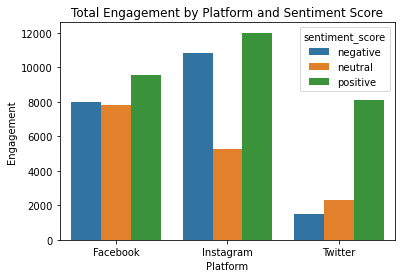

In [36]:
#Calculating engagement for each post type on different social media platforms.
dataset_grouped_smedia = dataset.groupby(['platform','post_type','sentiment_score'])[['likes', 'comments', 'shares']].sum().reset_index()
dataset_grouped_smedia['engagement'] = dataset_grouped_smedia['likes'] + dataset_grouped_smedia['comments'] + dataset_grouped_smedia['shares']
sns.barplot(data=dataset_grouped_smedia, x='platform', y='engagement', hue='sentiment_score', ci=None)
plt.title('Total Engagement by Platform and Sentiment Score')
plt.xlabel('Platform')
plt.ylabel('Engagement')
plt.show()

In [37]:
fig = px.bar(dataset_grouped_smedia,
             x='sentiment_score',
             y='engagement',
             color='post_type',
             barmode='group',
             title='Total Engagement by Platform and Post Type',
             hover_data=['platform'])
fig.show()